In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
step = [
    ("scaler",StandardScaler()),
    ("model",LogisticRegression())
]

In [4]:
pipe = Pipeline(step)
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [6]:
set_config(display="pipeline")

In [7]:
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [15]:
X,y = make_classification(n_samples=1000)   # here i can set a sample is 1000 because here sample are only a 20

In [16]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
X_train.shape

(800, 20)

In [18]:
X_test.shape

(200, 20)

In [20]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [21]:
y_pred= pipe.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1])

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
cm = confusion_matrix(y_test,y_pred)

In [24]:
import seaborn as sns

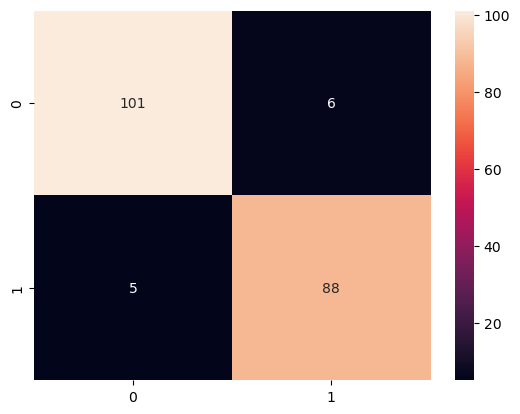

In [25]:
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [27]:
from sklearn.decomposition import PCA

In [28]:
steps = [
    ('scaling', StandardScaler()),
    ('pca',PCA(n_components=3)),
    ("svc",SVC())
]

In [30]:
pipe2 = Pipeline(steps)
pipe2

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=3)),
                ('svc', SVC())])

In [31]:
pipe2['scaling'].fit(X_train,y_train) # pipeline we also use a single/specific function

StandardScaler()

In [32]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=3)),
                ('svc', SVC())])

In [35]:
predicted_y = pipe2.predict(X_test)
predicted_y

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1])

In [36]:
cm_2 = confusion_matrix(y_test,predicted_y)

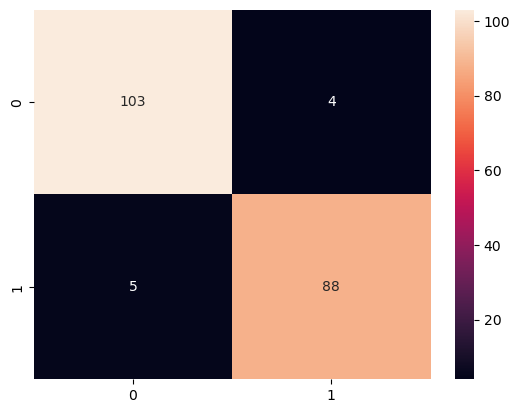

In [37]:
sns.heatmap(cm_2,annot=True,fmt="d")
plt.show()

# Complex Example of Column Transformer

In [38]:
# Handling missing values using sklearn library
from sklearn.impute import SimpleImputer  # for handling numerical data

In [39]:
numeric_preprocessor = Pipeline(
    steps = [("impute",SimpleImputer(missing_values=np.nan,strategy="mean")),
            ("scaler",StandardScaler())]
)

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
categeorical_preprocessor = Pipeline(
    steps = [
        ("imputation_constant", SimpleImputer(fill_value="missing",strategy="constant")),
        ('onehot',OneHotEncoder(handle_unknown="ignore"))
        
    ]
)

In [42]:
# Combine numeric_processor and categeorical_preprocessor
from sklearn.compose import ColumnTransformer

In [43]:
preprocessor = ColumnTransformer(
    [("categeorical",categeorical_preprocessor,["gender","city"]),
    ("numerical",numeric_preprocessor,['age','height'])]
)

In [44]:
preprocessor

ColumnTransformer(transformers=[('categeorical',
                                 Pipeline(steps=[('imputation_constant',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'city']),
                                ('numerical',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'height'])])

In [46]:
from sklearn.pipeline import make_pipeline

In [47]:
pipe = make_pipeline(preprocessor,LogisticRegression)

In [48]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categeorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'city']),
                                                 ('numerical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                       